In [1]:
import numpy as np # Basic python numeric library
import control as ctrl # Control systems library
import matplotlib.pyplot as plt # Python plots library
from scipy.constants import g # Gravity
%matplotlib inline

In [61]:
# Parameters
M = 1.0       # Cart mass
m = 0.2       # Pole mass
b = 0.1       # Pole friction
l = 0.3       # Pole length
theta = np.pi # Desired position

Kp1, Kd1, Kp2, Kd2 = 0.1, 0, 0.01, 0


In [62]:
# System matrices
A = np.array([[0,1,0,0],
              [0,-b/M,(m*g)/M,0],
              [0,0,0,1],
              [0,b/(M*l),-(M+m)*g/(M*l),0]])

B = np.array([[0],
              [1/M],
              [0],
              [-1/(M*l)]])

C = np.array([[1,0,0,0],
              [0,1,0,0],
              [0,0,1,0],
              [0,0,0,1]])

D = np.array([[0],
              [0],
              [0],
              [0]])

K = np.array([[Kp1, Kd1, Kp2, Kd2]])

In [63]:
eigvalsA, _ = np.linalg.eig(A)
eigvalsF, _ = np.linalg.eig(A - np.dot(B,K))
print(eigvalsA)
print(eigvalsF)

[ 0.00000000+0.j         -0.08333628+0.j         -0.00833186+6.26299784j
 -0.00833186-6.26299784j]
[-0.00833182+6.26166406j -0.00833182-6.26166406j -0.04166818+0.28571936j
 -0.04166818-0.28571936j]


In [64]:
sys = ctrl.ss(A - np.dot(B,K), np.zeros(B.shape), C, D)

In [69]:
# Simulation
t = np.arange(0,100,0.01)
[t_out, y_out] = ctrl.impulse_response(sys, T=t, X0 = [0,0,np.pi,0])

Text(0.5,0,'Time t [sec]')

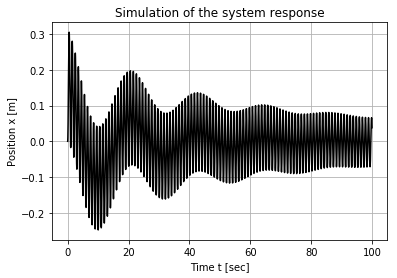

In [70]:
plt.figure()
plt.plot(t_out, y_out[0,:], 'k-')
plt.title('Simulation of the system response')
plt.ylabel('Position x [m]')
plt.grid()
plt.xlabel('Time t [sec]')

Text(0.5,0,'Time t [sec]')

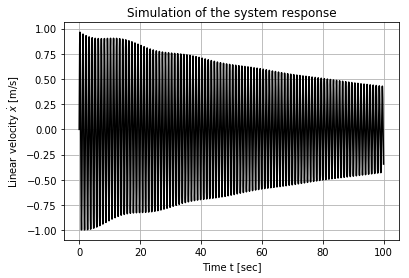

In [71]:
plt.figure()
plt.plot(t_out, y_out[1,:], 'k-')
plt.title('Simulation of the system response')
plt.ylabel(r'Linear velocity $\dot{x}$ [m/s]')
plt.grid()
plt.xlabel('Time t [sec]')

Text(0.5,0,'Time t [sec]')

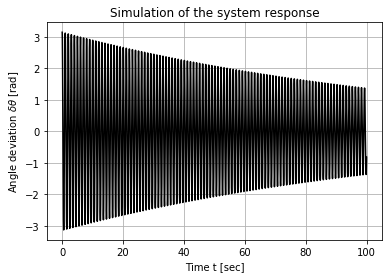

In [72]:
plt.figure()
plt.plot(t_out, y_out[2,:], 'k-')
plt.title('Simulation of the system response')
plt.ylabel(r'Angle deviation $\delta\theta$ [rad]')
plt.grid()
plt.xlabel('Time t [sec]')